In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
# Import libraries

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
# Split data into training and testing set after applying scaling


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor, AdaBoostRegressor

from sklearn import tree
from sklearn.model_selection import cross_validate



from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_squared_error
# Used sklearn specific library to create confusion_matrix, accuracy score, recall_score and classification report

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call
# Import libraries for visualisation and plotting


%matplotlib inline
# Line of code to save and pan, as using Matplotlib to plot and render

In [32]:
df = pd.read_csv("titanic.csv") # Import, read and explore the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df.info()
# Show total rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df.drop("Cabin", axis=1, inplace=True)
df.drop("Name", axis=1, inplace=True)
df.drop("Ticket", axis=1, inplace=True)
df.drop("PassengerId", axis=1, inplace=True)
# Chosen to drop Cabin, Name, Ticket and PassengerId columns, these are not required for creating decision tree

### One-Hot Encoding

In [35]:
df["Sex"].unique()
# Check unique values in "Sex" column.

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, converted it into a categorical representation.
Label Encoding: Assigning, for example, 0 for "male" and 1 for "female".

In [36]:
df ['Sex']= df['Sex'].map({'female': 0, 'male': 1})
df.head()
# Use array scaling, and label encoder.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


Now, do the same to the "Embarked" column.

In [37]:
df['Embarked'].unique
# Check unique values in "Embarked" column.

<bound method Series.unique of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [38]:
df ['Embarked']= df['Embarked'].map({'C': 0, 'S': 1, 'Q': 2})
df.head()
# Use array scaling and one hot encoder.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0


In [39]:
df.info()
# Show updated total rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [40]:
df.isnull().sum()
# Identify any null values in the dataset

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [41]:
imputer = SimpleImputer(strategy='most_frequent')
df.loc[:,['Age']] = imputer.fit_transform(df[['Age']])
# Imputing for missing values in column 'Age', with sklearn simple imputer.

<Axes: >

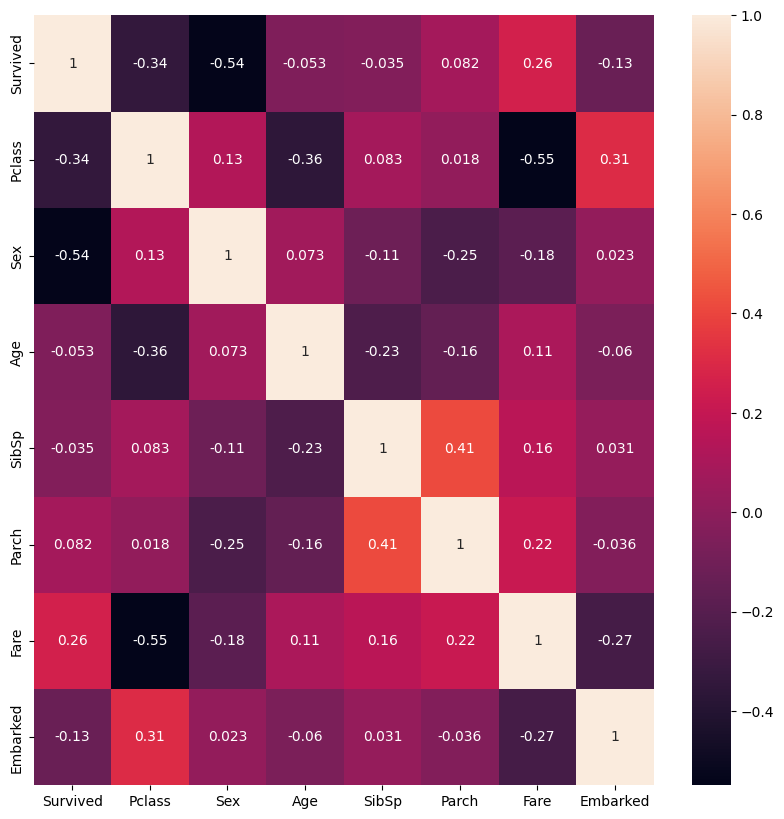

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,:].corr(), annot = True)
# Plot heatmap to show correlation 

In [43]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


In [45]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Train Test Split

In [46]:

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into train and test sets

X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
# Split the training set further into training and development sets

### DecisionTreeClassifier

Check train and test accuracy

In [47]:
# Create a Decision Tree Classifier 
unpruned_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree
unpruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

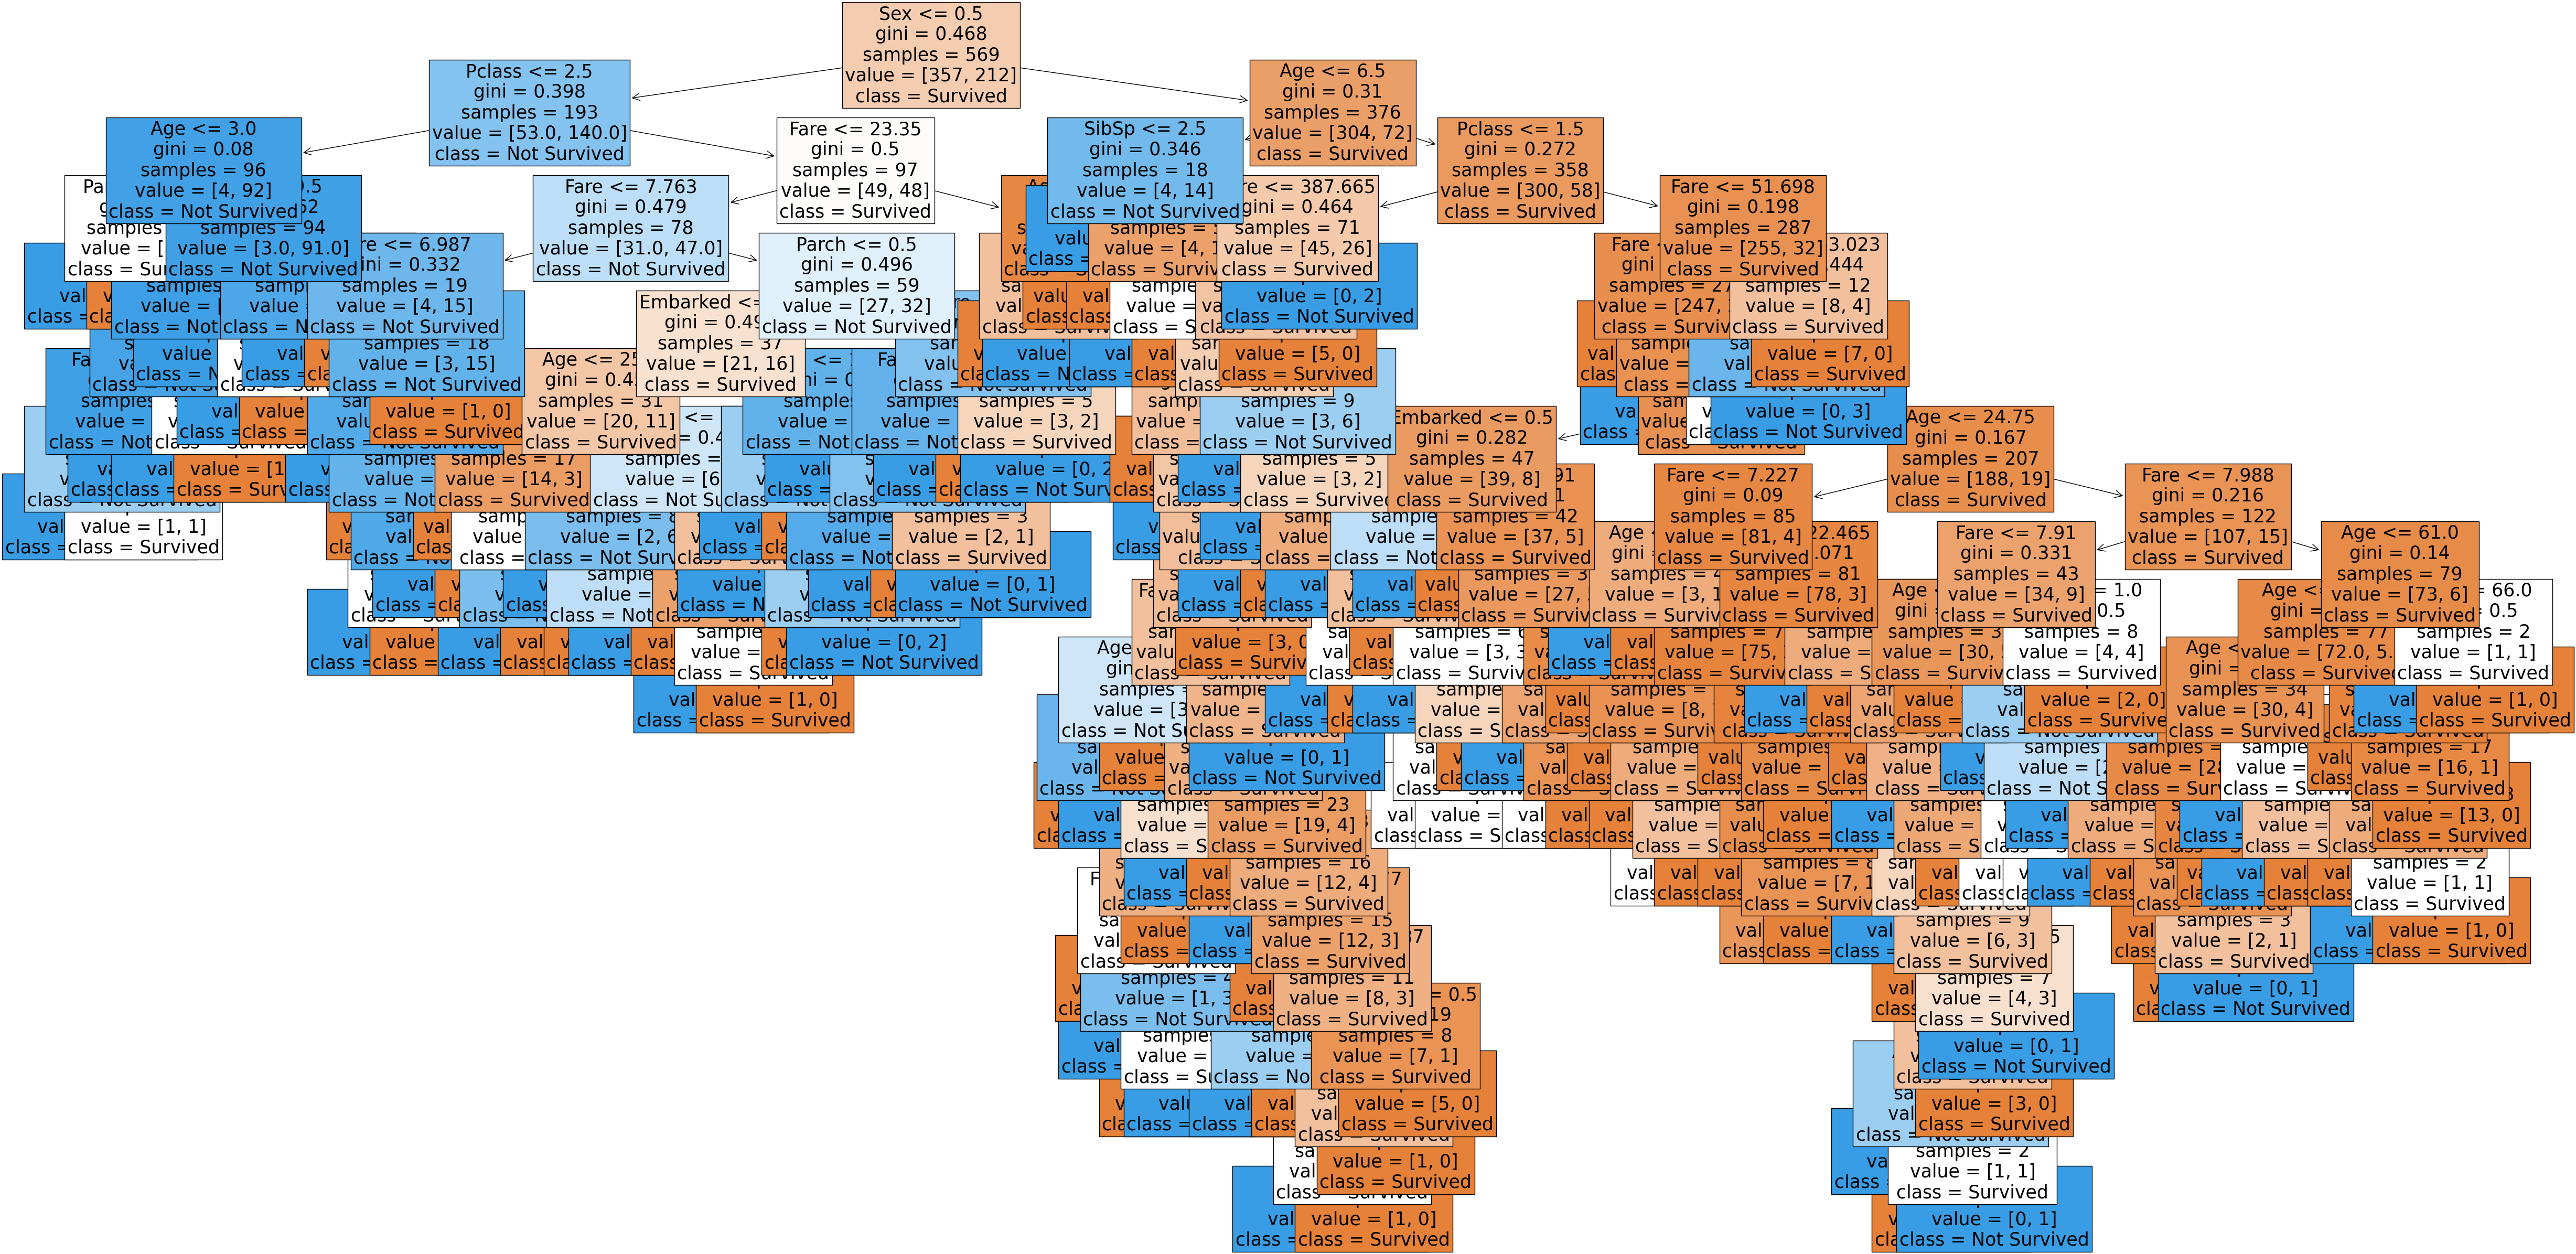

In [48]:
plt.figure(figsize=(60,30))
features = X_train.columns.tolist()
classes = ['Survived', 'Not Survived']
tree.plot_tree(unpruned_tree, feature_names=features, class_names=classes, filled=True, fontsize=25)
plt.show()
# Decision tree with no restriction imposed on depth of the tree

In [49]:
y_pred_dev = unpruned_tree.predict(X_dev)
accuracy = accuracy_score(y_dev,y_pred_dev)
accuracy
# Accuracy score of development set

0.7622377622377622

In [51]:
train_accuracies = []
dev_accuracies = []
# lists to store accuracies

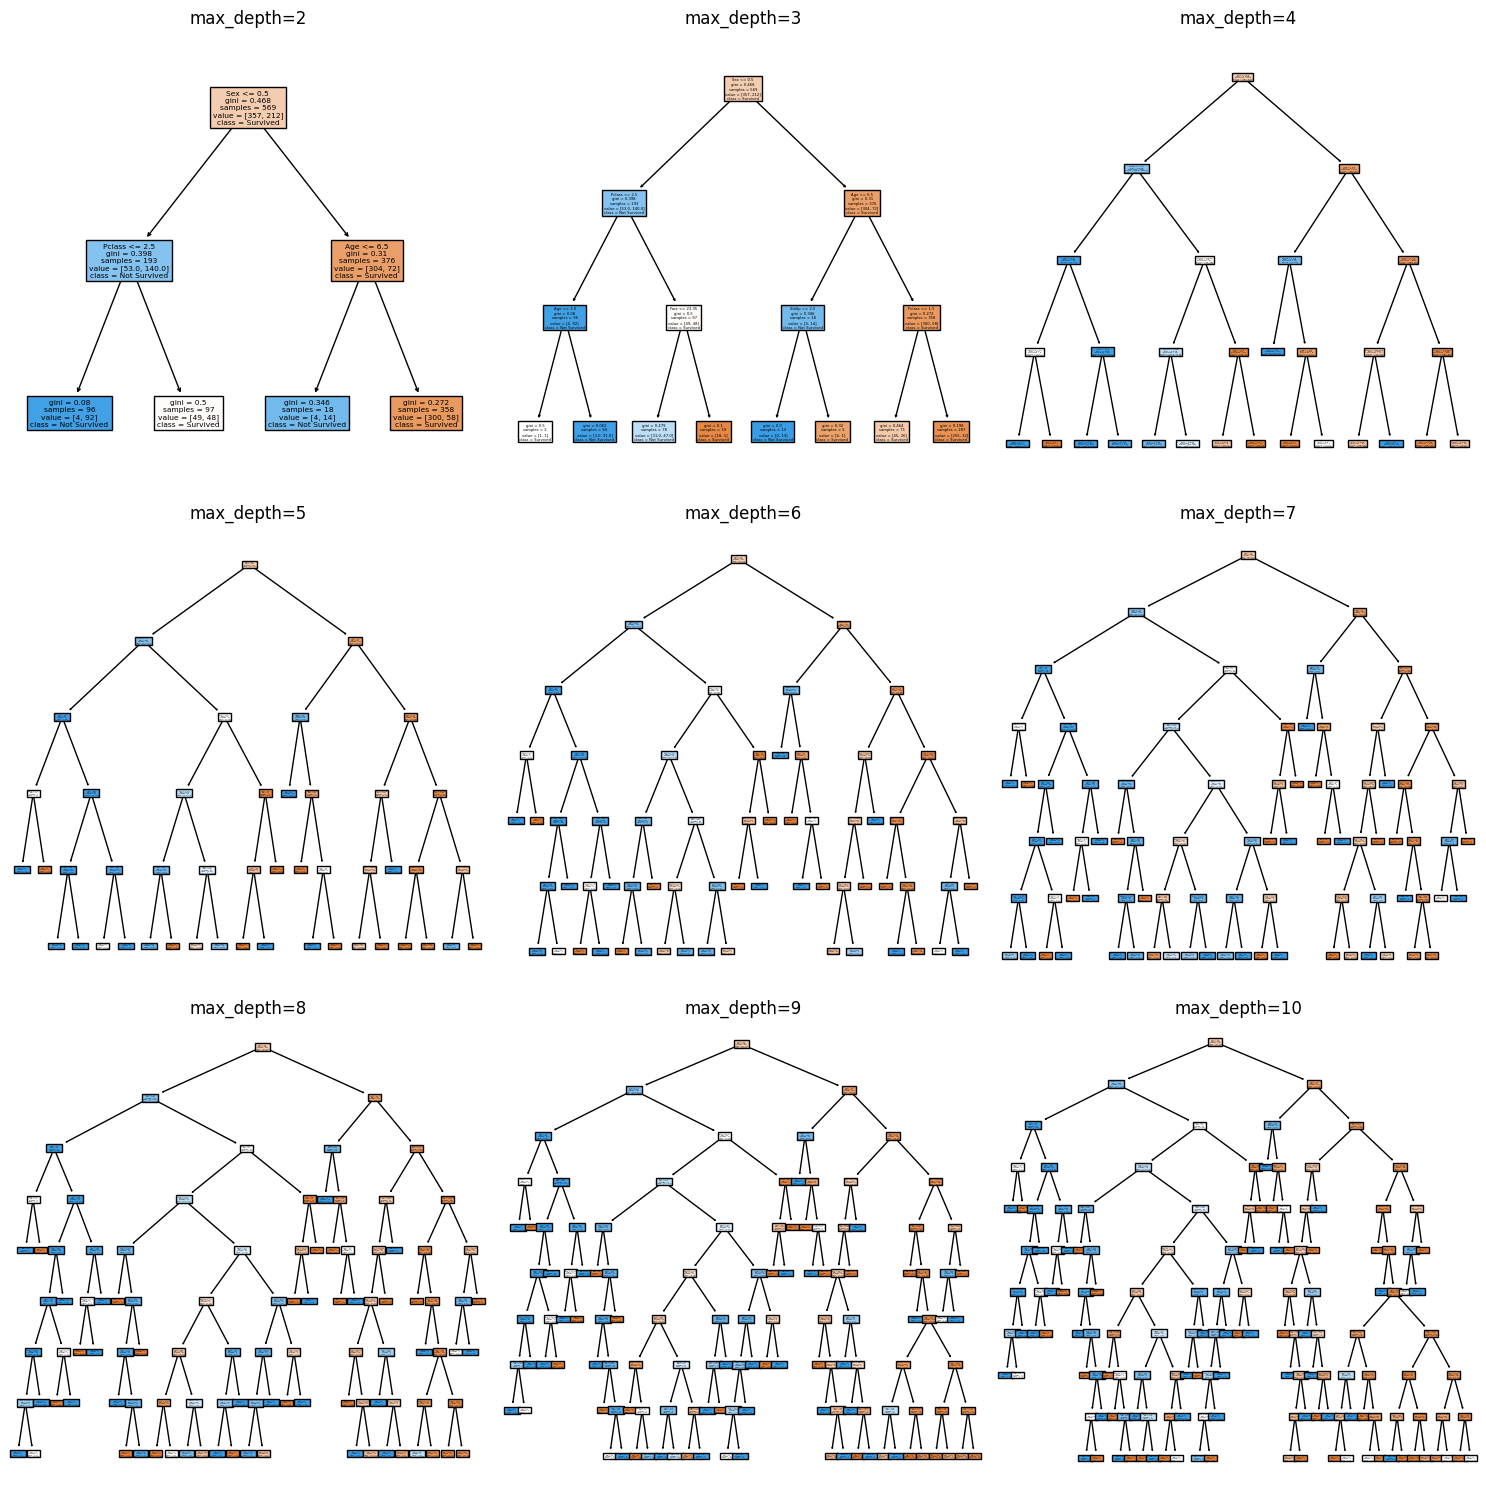

In [52]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15)) # 3 rows + 3 columns = 9 subplots
axes = axes.flatten() # for easy iteration

for i, max_depth in enumerate(range (2,11)):# looping over different max_depth values

  # Train Decision tree model with the current max_depth
  pruned_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  pruned_tree.fit(X_train, y_train)
  
  # Predict on train and dev sets
  y_train_pred = pruned_tree.predict(X_train)
  y_dev_pred =  pruned_tree.predict(X_dev)
  
  # Compute accuracies
  train_accuracy = accuracy_score(y_train,y_train_pred)
  dev_accuracy = accuracy_score(y_dev, y_dev_pred)
  
  # Store accuracies
  train_accuracies.append(train_accuracy)
  dev_accuracies.append(dev_accuracy)

  # Plot Decision Tree
  tree.plot_tree(pruned_tree, filled=True, feature_names=features, class_names=classes, ax=axes[i])
  axes[i].set_title(f"max_depth={max_depth}")

  # Adjust layout
plt.tight_layout()
plt.show()


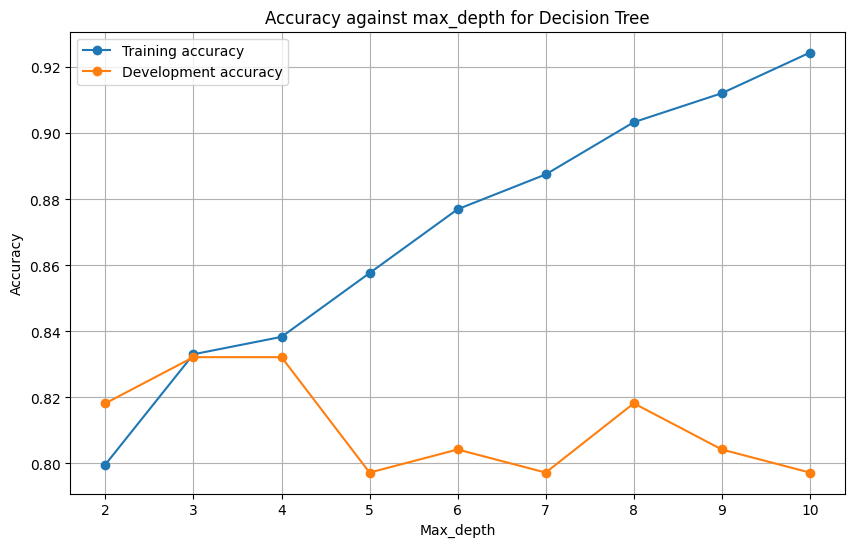

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), train_accuracies, marker= 'o', label='Training accuracy')
plt.plot(range(2, 11), dev_accuracies, marker= 'o', label='Development accuracy')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy against max_depth for Decision Tree')
plt.legend() # Important for when you have more than two lines in the same plot
plt.grid(True) # Good to have grid lines for plots like this
plt.show()

For the Decision Tree, there is a significant gap between training and development accuracy with tree depths over 3 and it grows beyond depth of 6. The training accuracy line is linear and development accuracy peaks at 3 depth.

In [54]:
# Create a Decision Tree Classifier and tree depth of 3
final_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the Decision Tree for test dataset
final_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [55]:
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Model Accuracy, how often is the classifier correct
print("Final_sec Training Accuracy:",accuracy_score(y_train, y_train_pred))
print("Final_sec Testing Accuracy:",accuracy_score(y_test, y_test_pred))

Final_sec Training Accuracy: 0.8330404217926186
Final_sec Testing Accuracy: 0.7988826815642458
